## Maximum intensity of truncated bessel beam

In [1]:

import numpy as np
import scipy as sp
from scipy.fft import fft2,ifft2,fftfreq,fftshift
import imageio
import scipy.special as sp

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

u = pint.UnitRegistry()

In [2]:
x = np.linspace(-5,5,2000)*u.mm
xv,yv = np.meshgrid(x,x)         #defining meshgrid in xy plane

/home/kanan/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:682: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)
/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


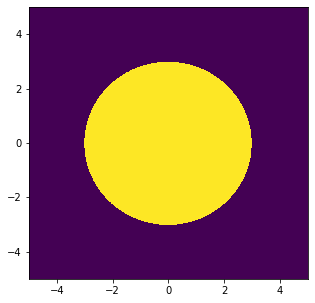

In [3]:
#defining circular aperture of 3mm radius

circ = np.sqrt(xv**2 + yv**2)<3*u.mm
U01 = circ.astype(float)
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U01)

In [4]:
#defining parameters of the bessel beam
n = 5
m = 5

### Defining the bessel beam $J_n(m\pi R)$

/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:136: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


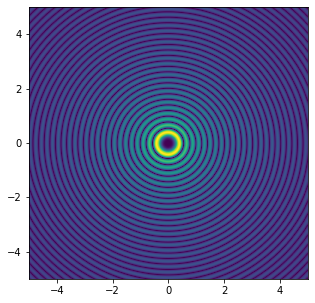

In [5]:

k1 = np.linspace(-5,5,2000)
xv1,yv1 = np.meshgrid(k1,k1)

R = np.sqrt((xv1**2)+(yv1**2))

U021 = (sp.jv(n,m*np.pi*R))*(xv1/R + 1j* yv1/R)**n
U02 = U021*u.mm

#plotting the bessel beam
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U02))

### Truncated bessel beam

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


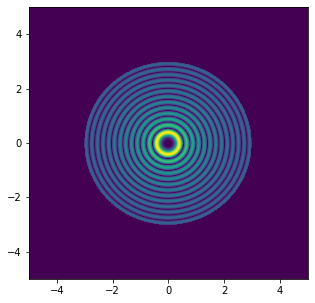

In [6]:
U0 = U01 * U02
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U0))        #plotting truncated bessel beam pattern
plt.show()

Now we propagate this truncated bessel beam by angular spectrum analysis formulas defined previously.

In [7]:
A = fft2(U0)
kx = fftfreq(len(x),np.diff(x)[0])*2*np.pi
kxv,kyv = np.meshgrid(kx,kx)


/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)


/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


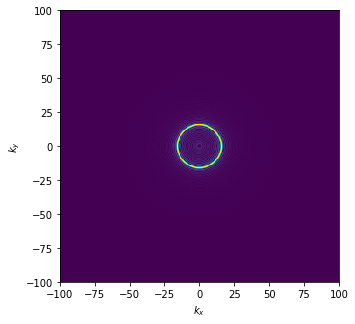

In [8]:
#plotting the fourier transform function
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude),fftshift(kyv.magnitude),np.abs(fftshift(A)))
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [9]:
def get_U(z,k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))


# This function returns diffraction pattern of bessel beam in xy plane at propagation 
# distance of z from the aperture

## Finding maximum intensity pattern

In [10]:
# finding maxima of the bessel function  J_n for normalisation
p = np.abs(sp.jv(n,m*R)).flatten()
maxx = max(p)

In [14]:
lam = 660*u.nm   #wavelength of light 
k = 2*np.pi/lam  #propagation vector magnitude
z = np.arange(0,260,1)  

L = []   
for i in z:
    z1 = i*u.cm         #distances from aperture at which we find diffraction patterns
    U = get_U(z1,k)     #diffraction pattern at distance z1
    c = np.abs(U)/maxx  #normaliazing the diffraction pattern
   
    L.append(max((c[1000][:])**2))    #maximum intensity at z cm distance from aperture
    

/home/kanan/.local/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)


### Plotting maximum intensity as function of distance

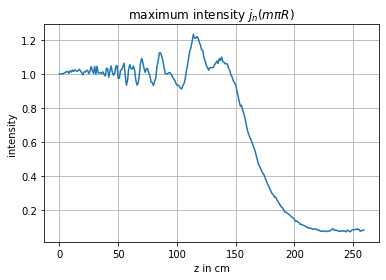

In [18]:
plt.plot(z,L)
plt.title('maximum intensity $j_n(m\pi R)$')
plt.xlabel('z in cm')
plt.ylabel('intensity')
plt.grid()

In [19]:
ccc = np.ones((1,len(L))).flatten()
k = np.argwhere(np.diff(np.sign(L-0.5*ccc)))
print(k)   #This gives distance in cm at which maximum intensity reduces to half of its initial value

[[168]]
